In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
from scipy.stats import vonmises
import random

In [3]:
def hex_grid(radius):
    coords = []
    for q in range(-radius, radius + 1):
        r1 = max(-radius, -q - radius)
        r2 = min(radius, -q + radius)
        for r in range(r1, r2 + 1):
            coords.append([q, r, -q - r])
    return coords

# Generate coordinates for a large hexagon with radius 4
radius = 4
coord = hex_grid(radius)

# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartesian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) / 3. for c in coord]

theta = np.radians(270)

# Rotate the coordinates
hcoord_rotated = [x * np.cos(theta) - y * np.sin(theta) for x, y in zip(hcoord, vcoord)]
vcoord_rotated = [x * np.sin(theta) + y * np.cos(theta) for x, y in zip(hcoord, vcoord)]

In [4]:
def makefig(angle, radius):# Create the figure and axis
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.set_aspect('equal')
    
    # Display the image
    ax.imshow(img, cmap='gray')  
    
    
    # Overlay the hexagons
    for i, (x, y) in enumerate(zip(hcoord_translated, vcoord_translated)):
        hex = RegularPolygon((x, y), numVertices=6, radius=radius,
                             orientation=np.radians(angle),  # Rotate hexagons to align with grid
                             facecolor='none', alpha=1, edgecolor='y')
        ax.text(x, y, i + 1, ha='center', va='center', size=10)  # Start numbering from 1
        ax.add_patch(hex)
    
    # Add scatter points for hexagon centers (optional)
    ax.scatter(hcoord_translated, vcoord_translated, alpha=0, c='grey')
    
    # Set limits to match the image dimensions
    plt.xlim(0, img.shape[1])
    plt.ylim(img.shape[0], 0)  # Flip y-axis for image alignment
    plt.show()

# Function to calculate Cartesian coordinates with scaling
def calculate_cartesian_coords(coord, hex_side_length):
    hcoord = [hex_side_length * c[0] * 1.5 for c in coord]  # Horizontal: scaled by 1.5 * side length
    vcoord = [hex_side_length * np.sqrt(3) * (c[1] - c[2]) / 2.0 for c in coord]  # Vertical: scaled
    return hcoord, vcoord


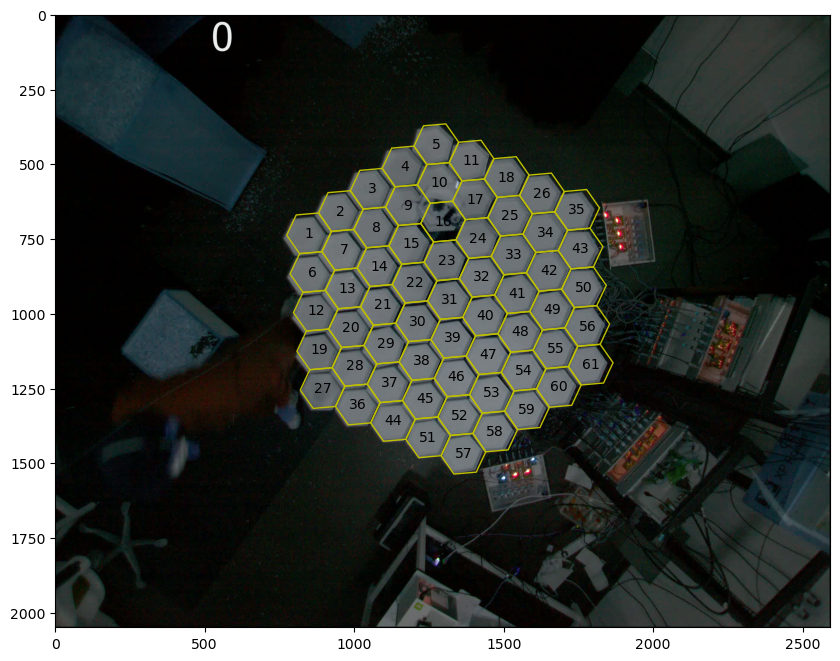

In [7]:
import sys
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import glob
import os
# THE IMPORTANT ONE
rawsession_folder = r"C:\Honeycomb_maze_task\rawdata\sub-002_id-1R\ses-01_date-10092025"

pattern = "T*.avi"
files = glob.glob(os.path.join(rawsession_folder, 'tracking', pattern))

video_path = files[0]
cap = cv2.VideoCapture(video_path)

ret, img = cap.read()   # img will hold the first frame as a NumPy array
cap.release()
if not ret:
    print("Failed to read first frame")

cap.release()



radius = 4
hex_side_length = 75# Length of the side of the hexagon
theta = np.radians(305)  # Rotation angle in radians
desired_x, desired_y = 1320, 950
coord = hex_grid(radius)
rotation = 25
# Calculate initial Cartesian coordinates
hcoord2, vcoord2 = calculate_cartesian_coords(coord, hex_side_length)


# Rotate the coordinates
hcoord_rotated = [x * np.cos(theta) - y * np.sin(theta) for x, y in zip(hcoord2, vcoord2)]
vcoord_rotated = [x * np.sin(theta) + y * np.cos(theta) for x, y in zip(hcoord2, vcoord2)]
vcoord_rotated = [-v for v in vcoord_rotated]


# Calculate the translation needed to align the first rotated coordinate
dx = desired_x - hcoord_rotated[30]
dy = desired_y - vcoord_rotated[30]

# Apply the translation
hcoord_translated = [x + dx for x in hcoord_rotated]
vcoord_translated = [y + dy for y in vcoord_rotated]

makefig(rotation,hex_side_length)

In [11]:
vcoord_rotated[0]

-564.0431576851147

In [ ]:
#New honeycomb

#Creating plot
fig, ax = plt.subplots(1, figsize=(6,6))
ax.set_aspect('equal')


# Add some coloured hexagons and adjust the orientation to match the rotated grid
for i, (x, y) in enumerate(zip(hcoord_rotated, vcoord_rotated)):
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3.,
                         orientation=np.radians(60),  # Rotate hexagons to align with grid
                         facecolor='grey', alpha=0.2, edgecolor='k')
    ax.text(x, y, i + 1, ha='center', va='center', size=15)  # Start numbering from 1
    ax.add_patch(hex)


# Also add scatter points in hexagon centres
ax.scatter(hcoord, vcoord, alpha=0, c = 'grey')


plt.show()


NameError: name 'plt' is not defined

: 

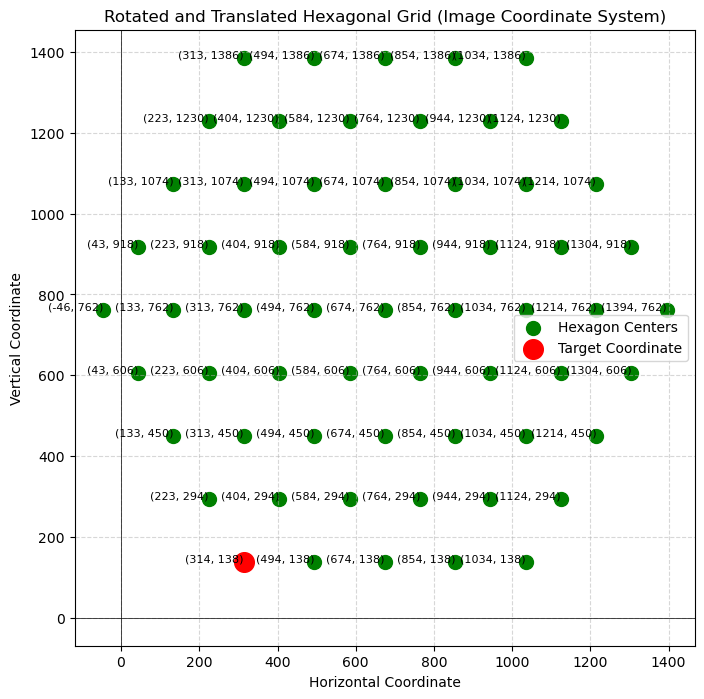

In [69]:
# Function to calculate Cartesian coordinates with scaling
def calculate_cartesian_coords(coord, hex_side_length):
    hcoord = [hex_side_length * c[0] * 1.5 for c in coord]  # Horizontal: scaled by 1.5 * side length
    vcoord = [hex_side_length * np.sqrt(3) * (c[1] - c[2]) / 2.0 for c in coord]  # Vertical: scaled
    return hcoord, vcoord

# Parameters
radius = 4
hex_side_length = 104  # Length of the side of the hexagon
desired_x, desired_y = 314, 138  # Desired first rotated coordinate
theta = np.radians(270)  # Rotation angle in radians

# Generate the hexagonal grid
coord = hex_grid(radius)

# Calculate initial Cartesian coordinates
hcoord2, vcoord2 = calculate_cartesian_coords(coord, hex_side_length)


# Rotate the coordinates
hcoord_rotated = [x * np.cos(theta) - y * np.sin(theta) for x, y in zip(hcoord2, vcoord2)]
vcoord_rotated = [x * np.sin(theta) + y * np.cos(theta) for x, y in zip(hcoord2, vcoord2)]
vcoord_rotated = [-v for v in vcoord_rotated]


# Calculate the translation needed to align the first rotated coordinate
dx = desired_x - hcoord_rotated[0]
dy = desired_y - vcoord_rotated[0]

# Apply the translation
hcoord_translated = [x + dx for x in hcoord_rotated]
vcoord_translated = [y + dy for y in vcoord_rotated]

# Visualization of the final grid
plt.figure(figsize=(8, 8))
plt.scatter(hcoord_translated, vcoord_translated, c='green', s=100, label='Hexagon Centers')
plt.scatter([desired_x], [desired_y], c='red', s=200, label='Target Coordinate')

# Annotate the points
for x, y in zip(hcoord_translated, vcoord_translated):
    plt.text(x, y, f'({int(x)}, {int(y)})', fontsize=8, ha='right')

plt.title('Rotated and Translated Hexagonal Grid (Image Coordinate System)')
plt.xlabel('Horizontal Coordinate')
plt.ylabel('Vertical Coordinate')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


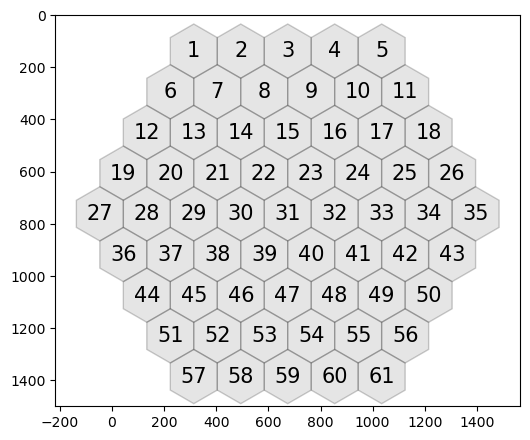

In [87]:
#New honeycomb

#Creating plot
fig, ax = plt.subplots(1, figsize=(6,6))
ax.set_aspect('equal')


# Add some coloured hexagons and adjust the orientation to match the rotated grid
for i, (x, y) in enumerate(zip(hcoord_translated, vcoord_translated)):
    hex = RegularPolygon((x, y), numVertices=6, radius=104,
                         orientation=np.radians(60),  # Rotate hexagons to align with grid
                         facecolor='grey', alpha=0.2, edgecolor='k')
    ax.text(x, y, i + 1, ha='center', va='center', size=15)  # Start numbering from 1
    ax.add_patch(hex)


# Also add scatter points in hexagon centres
ax.scatter(hcoord_translated, vcoord_translated, alpha=0, c = 'grey')

plt.ylim(1500,0)
plt.show()


In [145]:
def makefig(angle, radius):# Create the figure and axis
    fig, ax = plt.subplots(1, figsize=(6, 6))
    ax.set_aspect('equal')
    
    # Display the image
    ax.imshow(img, cmap='gray')  
    
    
    # Overlay the hexagons
    for i, (x, y) in enumerate(zip(hcoord_translated, vcoord_translated)):
        hex = RegularPolygon((x, y), numVertices=6, radius=radius,
                             orientation=np.radians(angle),  # Rotate hexagons to align with grid
                             facecolor='none', alpha=1, edgecolor='y')
        ax.text(x, y, i + 1, ha='center', va='center', size=15)  # Start numbering from 1
        ax.add_patch(hex)
    
    # Add scatter points for hexagon centers (optional)
    ax.scatter(hcoord_translated, vcoord_translated, alpha=0, c='grey')
    
    # Set limits to match the image dimensions
    plt.xlim(0, img.shape[1])
    plt.ylim(img.shape[0], 0)  # Flip y-axis for image alignment
    plt.show()


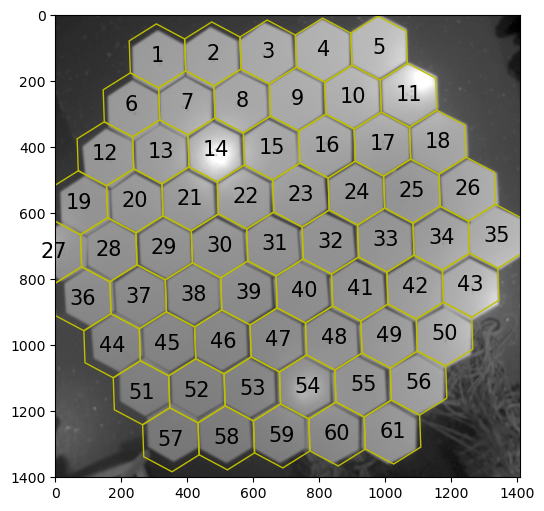

In [346]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np

# Load the image
img = cv2.imread('/Users/Sophia/Documents/Work/Rat location tracking/raised_platforms_2711.png', cv2.IMREAD_GRAYSCALE)


# Parameters
radius = 4
hex_side_length = 97# Length of the side of the hexagon

theta = np.radians(272)  # Rotation angle in radians
desired_x, desired_y = 666, 693
# Generate the hexagonal grid
coord = hex_grid(radius)

# Calculate initial Cartesian coordinates
hcoord2, vcoord2 = calculate_cartesian_coords(coord, hex_side_length)


# Rotate the coordinates
hcoord_rotated = [x * np.cos(theta) - y * np.sin(theta) for x, y in zip(hcoord2, vcoord2)]
vcoord_rotated = [x * np.sin(theta) + y * np.cos(theta) for x, y in zip(hcoord2, vcoord2)]
vcoord_rotated = [-v for v in vcoord_rotated]


# Calculate the translation needed to align the first rotated coordinate
dx = desired_x - hcoord_rotated[30]
dy = desired_y - vcoord_rotated[30]

# Apply the translation
hcoord_translated = [x + dx for x in hcoord_rotated]
vcoord_translated = [y + dy for y in vcoord_rotated]

makefig(58,hex_side_length)

In [320]:
from matplotlib.path import Path

def is_point_in_hexagon(rat_locx, rat_locy, hcoord, vcoord, hex_radius=hex_side_length):
    hex_vertices = []
    for angle in np.linspace(0, 2 * np.pi, num=6, endpoint=False):
        hex_vertices.append([
            hcoord + hex_radius * np.cos(angle),
            vcoord + hex_radius * np.sin(angle)
        ])
    hexagon_path = Path(hex_vertices)
    return hexagon_path.contains_point((rat_locx, rat_locy))

# Updated code to find the hexagon the rat is in
def find_hexagon_by_point(rat_locx, rat_locy, hcoord, vcoord):
    for i, (x, y) in enumerate(zip(hcoord, vcoord)):
        if is_point_in_hexagon(rat_locx, rat_locy, x, y):
            return i + 1
    return -1  # Return -1 if no hexagon is found (which shouldn't happen in a well-formed grid)

In [350]:
find_hexagon_by_point(666,705, hcoord_translated, vcoord_translated)

31

In [352]:
hcoord_translated[0]

309.8753292501658

28


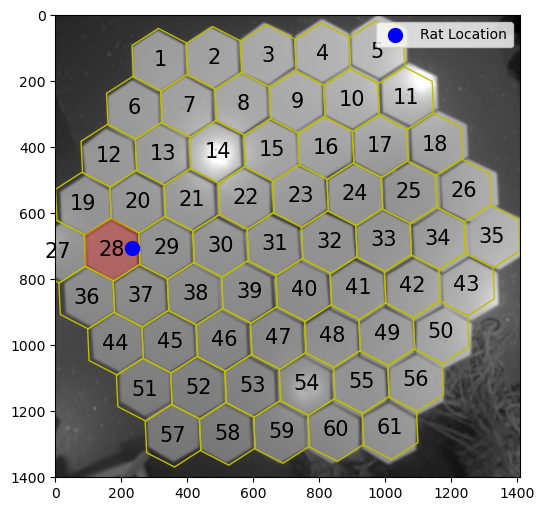

In [332]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np

# Function to visualize the hexagon the rat is located in
def visualize_rat_location(rat_locx, rat_locy, hcoord_translated, vcoord_translated, hex_radius):
    # Create the figure and axis
    fig, ax = plt.subplots(1, figsize=(6, 6))
    ax.set_aspect('equal')
    
    # Display the image
    ax.imshow(img, cmap='gray')
    
    # Overlay the hexagons
    for i, (x, y) in enumerate(zip(hcoord_translated, vcoord_translated)):
        hex = RegularPolygon((x, y), numVertices=6, radius=hex_radius,
                             orientation=1,  # Align hexagons with grid
                             facecolor='none', alpha=1, edgecolor='y')
        ax.text(x, y, i + 1, ha='center', va='center', size=15)  # Start numbering from 1

        ax.add_patch(hex)
        
        # Highlight the hexagon containing the rat
        if is_point_in_hexagon(rat_locx, rat_locy, x, y):
            highlight_hex = RegularPolygon((x, y), numVertices=6, radius=hex_radius,
                                           orientation=0, facecolor='red', alpha=0.3)
            ax.add_patch(highlight_hex)
    k = find_hexagon_by_point(rat_locx, rat_locy, hcoord_translated, vcoord_translated)
    print(k)

    # Plot the rat's location
    ax.scatter(rat_locx, rat_locy, c='blue', s=100, label='Rat Location')
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Set limits to match the image dimensions
    plt.xlim(0, img.shape[1])
    plt.ylim(img.shape[0], 0)  # Flip y-axis for image alignment
    plt.show()

# Call the visualization function



31


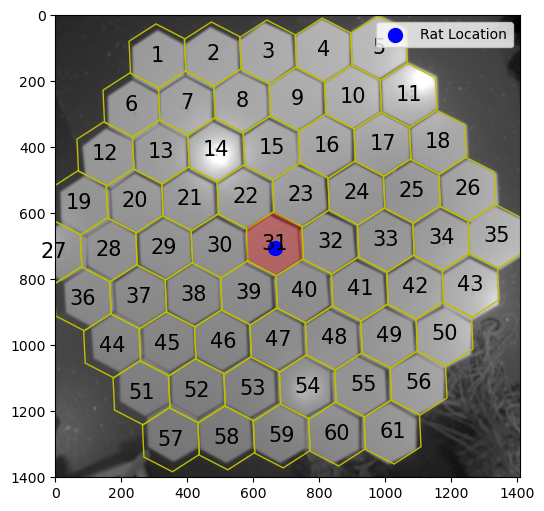

In [348]:
visualize_rat_location(666, 705, hcoord_translated, vcoord_translated, hex_radius=hex_side_length)